# regressões linearea
### 15/out/2024

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.tsa.api as smt   
import statsmodels as sm



In [2]:
dados = pd.read_excel('exemplo_inicial_RLS.xlsx')
dados

,Fertilizante (kg/ha),Produtividade (t/ha)
0,50,45.75
1,60,52.79
2,70,72.33
3,80,71.28
4,90,76.65
5,100,75.45
6,110,95.37
7,120,95.64
8,130,108.30
9,140,100.67


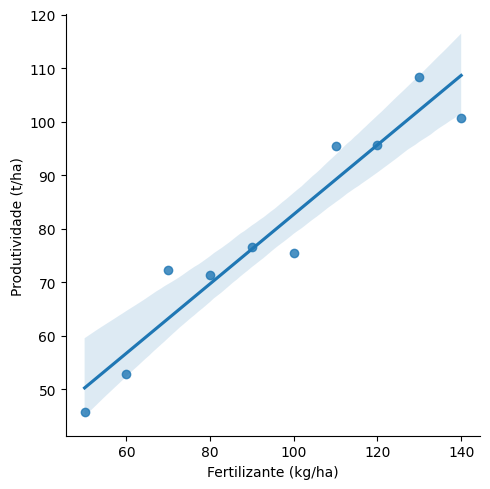

In [3]:
sns.lmplot(x='Fertilizante (kg/ha)',
           y='Produtividade (t/ha)',
           data=dados
           )

In [4]:
#para facilitar
xobs = dados['Fertilizante (kg/ha)']
yobs = dados['Produtividade (t/ha)']

In [5]:
stats.pearsonr(xobs,yobs)

PearsonRResult(statistic=0.9577082922225209, pvalue=1.3297990571693803e-05)

In [6]:
### RLS sem intercepto ( = constante, coeficiente linear) -= zero
import statsmodels.api as sm
from statsmodels.api import OLS

modelo = sm.OLS(yobs, xobs)
resultado1 = modelo.fit()
resultado1.summary()

C:\Users\Paulo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Produtividade (t/ha)   R-squared (uncentered):                   0.991
Model:                              OLS   Adj. R-squared (uncentered):              0.990
Method:                   Least Squares   F-statistic:                              1031.
Date:                  Tue, 15 Oct 2024   Prob (F-statistic):                    1.35e-10
Time:                          09:13:24   Log-Likelihood:                         -34.479
No. Observations:                    10   AIC:                                      70.96
Df Residuals:                         9   BIC:                                      71.26
Df Model:                             1                                                  
Covariance Type:              nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Fertilizante (kg/ha)     0.8203      0.026     32.113      0.000       0.763       0.878
==============================================================================
Omnibus:                        1.717   Durbin-Watson:                   1.353
Prob(Omnibus):                  0.424   Jarque-Bera (JB):                0.350
Skew:                          -0.451   Prob(JB):                        0.839
Kurtosis:                       3.162   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
dados['Yest_sem_intercepto'] = resultado1.predict(xobs)
dados

,Fertilizante (kg/ha),Produtividade (t/ha),Yest_sem_intercepto
0,50,45.75,41.017360
1,60,52.79,49.220832
2,70,72.33,57.424305
3,80,71.28,65.627777
4,90,76.65,73.831249
5,100,75.45,82.034721
6,110,95.37,90.238193
7,120,95.64,98.441665
8,130,108.30,106.645137
9,140,100.67,114.848609


### RLS com intercepto ajustado ou treinado(+comumm)

In [8]:
xobs_const = sm.add_constant(xobs)
xobs_const
modelo = sm.OLS(yobs, xobs_const)
resultado2 = modelo.fit()
resultado2.summary()

C:\Users\Paulo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Produtividade (t/ha)   R-squared:                       0.917
Model:                              OLS   Adj. R-squared:                  0.907
Method:                   Least Squares   F-statistic:                     88.62
Date:                  Tue, 15 Oct 2024   Prob (F-statistic):           1.33e-05
Time:                          09:13:24   Log-Likelihood:                -31.415
No. Observations:                    10   AIC:                             66.83
Df Residuals:                         8   BIC:                             67.43
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   17.7899      6.840      2.601      0.032       2.018      33.562
Fertilizante (kg/ha)     0.6488      0.069      9.414      0.000       0.490       0.808
==============================================================================
Omnibus:                        1.125   Durbin-Watson:                   2.375
Prob(Omnibus):                  0.570   Jarque-Bera (JB):                0.672
Skew:                           0.120   Prob(JB):                        0.715
Kurtosis:                       1.753   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:

dados['Yest_com_intercepto'] = resultado2.predict(xobs_const)
dados

,Fertilizante (kg/ha),Produtividade (t/ha),Yest_sem_intercepto,Yest_com_intercepto
0,50,45.75,41.017360,50.228364
1,60,52.79,49.220832,56.716061
2,70,72.33,57.424305,63.203758
3,80,71.28,65.627777,69.691455
4,90,76.65,73.831249,76.179152
5,100,75.45,82.034721,82.666848
6,110,95.37,90.238193,89.154545
7,120,95.64,98.441665,95.642242
8,130,108.30,106.645137,102.129939
9,140,100.67,114.848609,108.617636


<Axes: xlabel='Fertilizante (kg/ha)', ylabel='Yest_com_intercepto'>

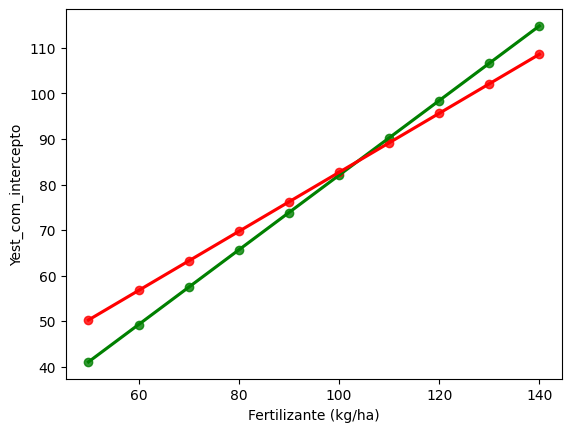

In [10]:
#sns.lmplot ja faz o grafico de regressão com o interceptp
sns.regplot(x='Fertilizante (kg/ha)',
            y='Yest_sem_intercepto',
            data=dados,
            label='sem intercepto',
            color='green')
sns.regplot(x='Fertilizante (kg/ha)',
            y='Yest_com_intercepto',
            data=dados,
            label='com intercepto',
            color='red')

In [11]:
resultado2.pvalues

const                   0.031569
Fertilizante (kg/ha)    0.000013
dtype: float64

In [12]:
resultado2.rsquared


0.9172051729917776

In [13]:
resultado2.rsquared_adj

0.9068558196157498

In [14]:
# Calculando os residuos com o modelo com intercepto
dados['residuo'] = dados['Produtividade (t/ha)'] - dados['Yest_com_intercepto']
dados.head(3)

,Fertilizante (kg/ha),Produtividade (t/ha),Yest_sem_intercepto,Yest_com_intercepto,residuo
0,50,45.75,41.017360,50.228364,-4.478364
1,60,52.79,49.220832,56.716061,-3.926061
2,70,72.33,57.424305,63.203758,9.126242


''

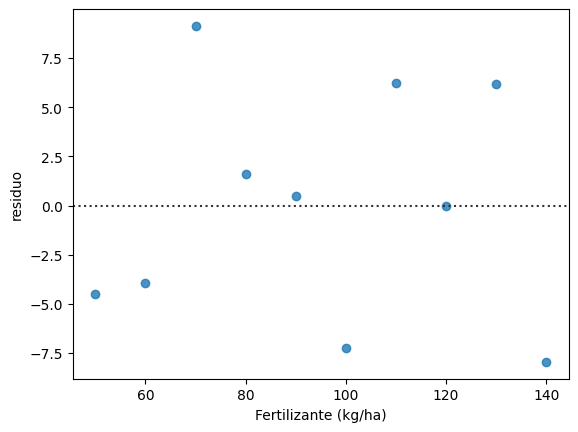

In [22]:
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
sns.residplot(
    x='Fertilizante (kg/ha)',
    y='residuo',
    data=dados
    )
;

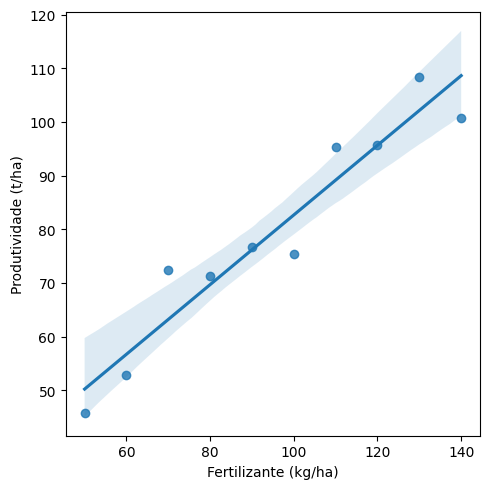

In [20]:
#PENSANDO NO MEU ARTIGO A1
sns.lmplot(
    x='Fertilizante (kg/ha)',
    y='Produtividade (t/ha)',
    data=dados
    )
sns.despine(
    left=False,
    bottom=False,
    right=False,
    top=False
    )
plt.text(55,115,'A', fontsize=15)
plx.xlabel('Fertilizante (kg/ha)', fontsize=15)
plx.ylabel('Produtividade (t/ha)', fontsize=15)

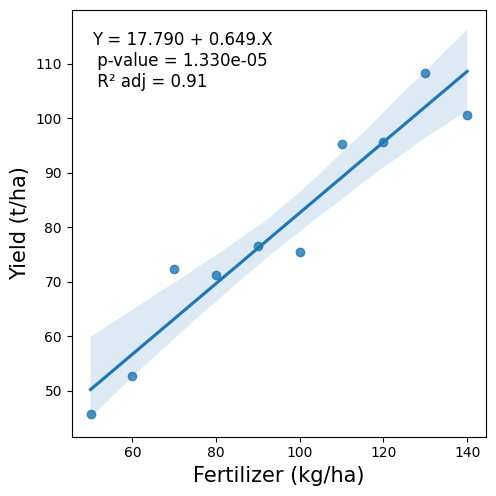

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotando a regressão linear entre Fertilizante e Produtividade
sns.lmplot(x='Fertilizante (kg/ha)', 
           y='Produtividade (t/ha)', 
           data=dados
           )

# Ajustando o estilo do gráfico para remover as bordas
sns.despine(left=False,
            bottom=False,
            right=False,
            top=False
                )

# Definindo rótulos para os eixos
plt.xlabel('Fertilizer (kg/ha)',
           fontsize=15)
plt.ylabel('Yield (t/ha)',
           fontsize=15
           )

# Capturando os resultados do ajuste da regressão
r2aj = resultado2.rsquared_adj               # R² ajustado
valorp_regressao = resultado2.f_pvalue       # Valor p da regressão
coeflin = resultado2.params.const            # Coeficiente linear (intercepto)
coefang = resultado2.params.iloc[1]          # Coeficiente angular (slope)

# Fórmula de regressão e valores capturados
texto = 'Y = {:.3f} + {:.3f}.X \n p-value = {:.3e} \n R² adj = {:.2f}'.format(coeflin, coefang, valorp_regressao, r2aj)

# Exibindo o texto no gráfico
plt.text(0.05, 0.95, texto,
         transform=plt.gca().transAxes,
         fontsize=12,
         verticalalignment='top'
         )


plt.show()


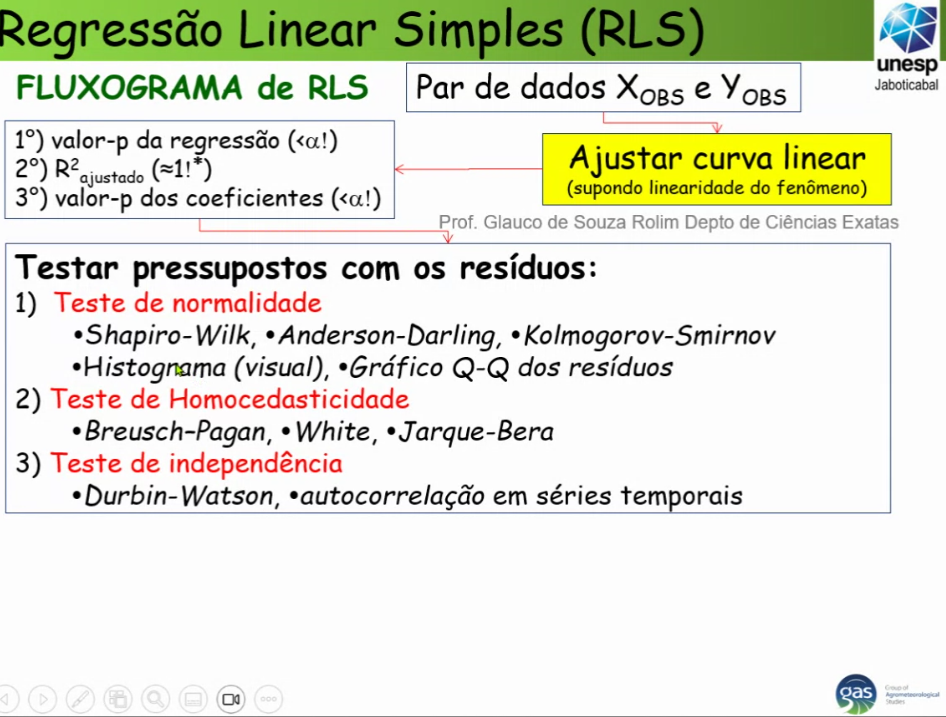

# Regressão Linear Simples (RLS)

**FLUXOGRAMA de RLS**

Par de dados: \( X_{OBS} \) e \( Y_{OBS} \)

+--------------------------------------------------------+
|                      Ajustar curva linear              |
|            (supondo linearidade do fenômeno)            |
+--------------------------------------------------------+

1º Valor-p da regressão ( \(\alpha !\) )

2º \( R^2_{ajustado} \) ( ≈ 1! *)

3º Valor-p dos coeficientes ( \(\alpha !\) )

---

## Testar pressupostos com os resíduos:

### 1) **Teste de Normalidade**
   - Shapiro-Wilk
   - Anderson-Darling
   - Kolmogorov-Smirnov
   - Histogramas (visual)
   - Gráfico Q-Q dos resíduos

### 2) **Teste de Homocedasticidade**
   - Breusch-Pagan
   - White
   - Jarque-Bera

### 3) **Teste de Independência**
   - Durbin-Watson
   - Autocorrelação em séries temporais



In [30]:
# +-----------------------------+
# |      Tudo OK com os testes?  |
# +-----------------------------+
#           /        \
#        Sim          Não
#         /            \
# +-------------------+      +------------------------+
# | Seguir para Teste  |      | Transformação de dados |
# |   de Hat (BKW)     |      +------------------------+
# +-------------------+              /        \
#                                  Sim         Não
#                                   /           \
#                +------------------------+    +---------------------+
#                | Retirar pontos?        |    | Regressão Não Linear |
#                | (Outliers ou Influentes)|    +---------------------+
#                +------------------------+

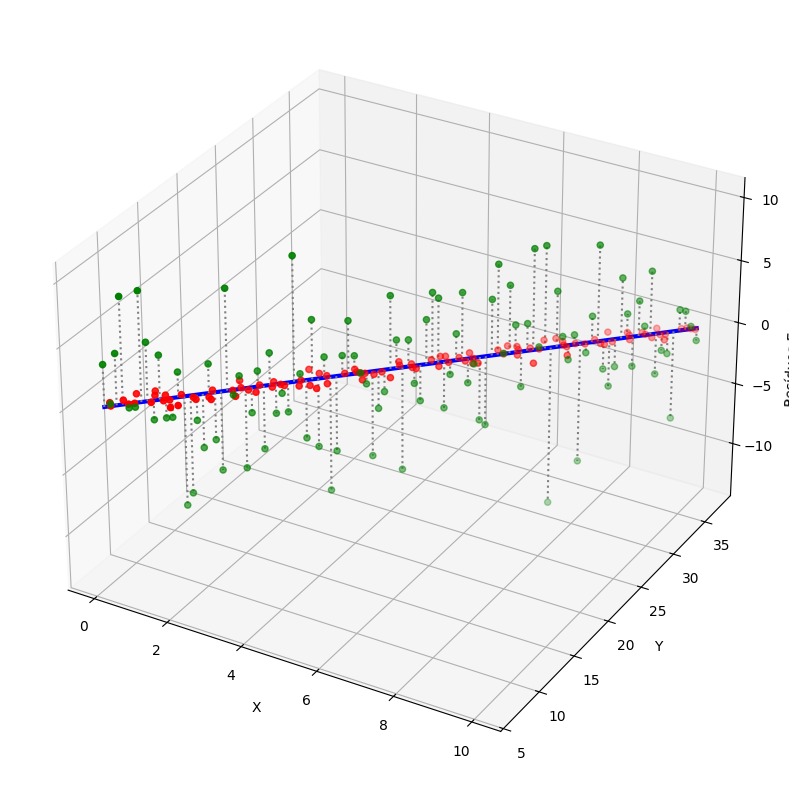

In [41]:
# Criando a figura 3D
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Pontos observados
ax.scatter(X, Y, np.zeros_like(Y), color='r')

# Linha de regressão (reta azul)
ax.plot(X, Y_pred, np.zeros_like(Y_pred), color='b', lw=3)

# Exagerando os resíduos (erros)
residuos = Y - Y_pred
ax.scatter(X, Y_pred, residuos*5, color='g', label='Resíduos Exagerados')  # Multiplicando por 5 para exagerar

# Linhas que conectam os pontos à linha de regressão
for i in range(len(X)):
    ax.plot([X[i], X[i]], [Y_pred[i], Y_pred[i]], [0, residuos[i]*5], color='gray', linestyle='dotted')

# Ajustes dos eixos
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Resíduos Exagerados')

plt.show()



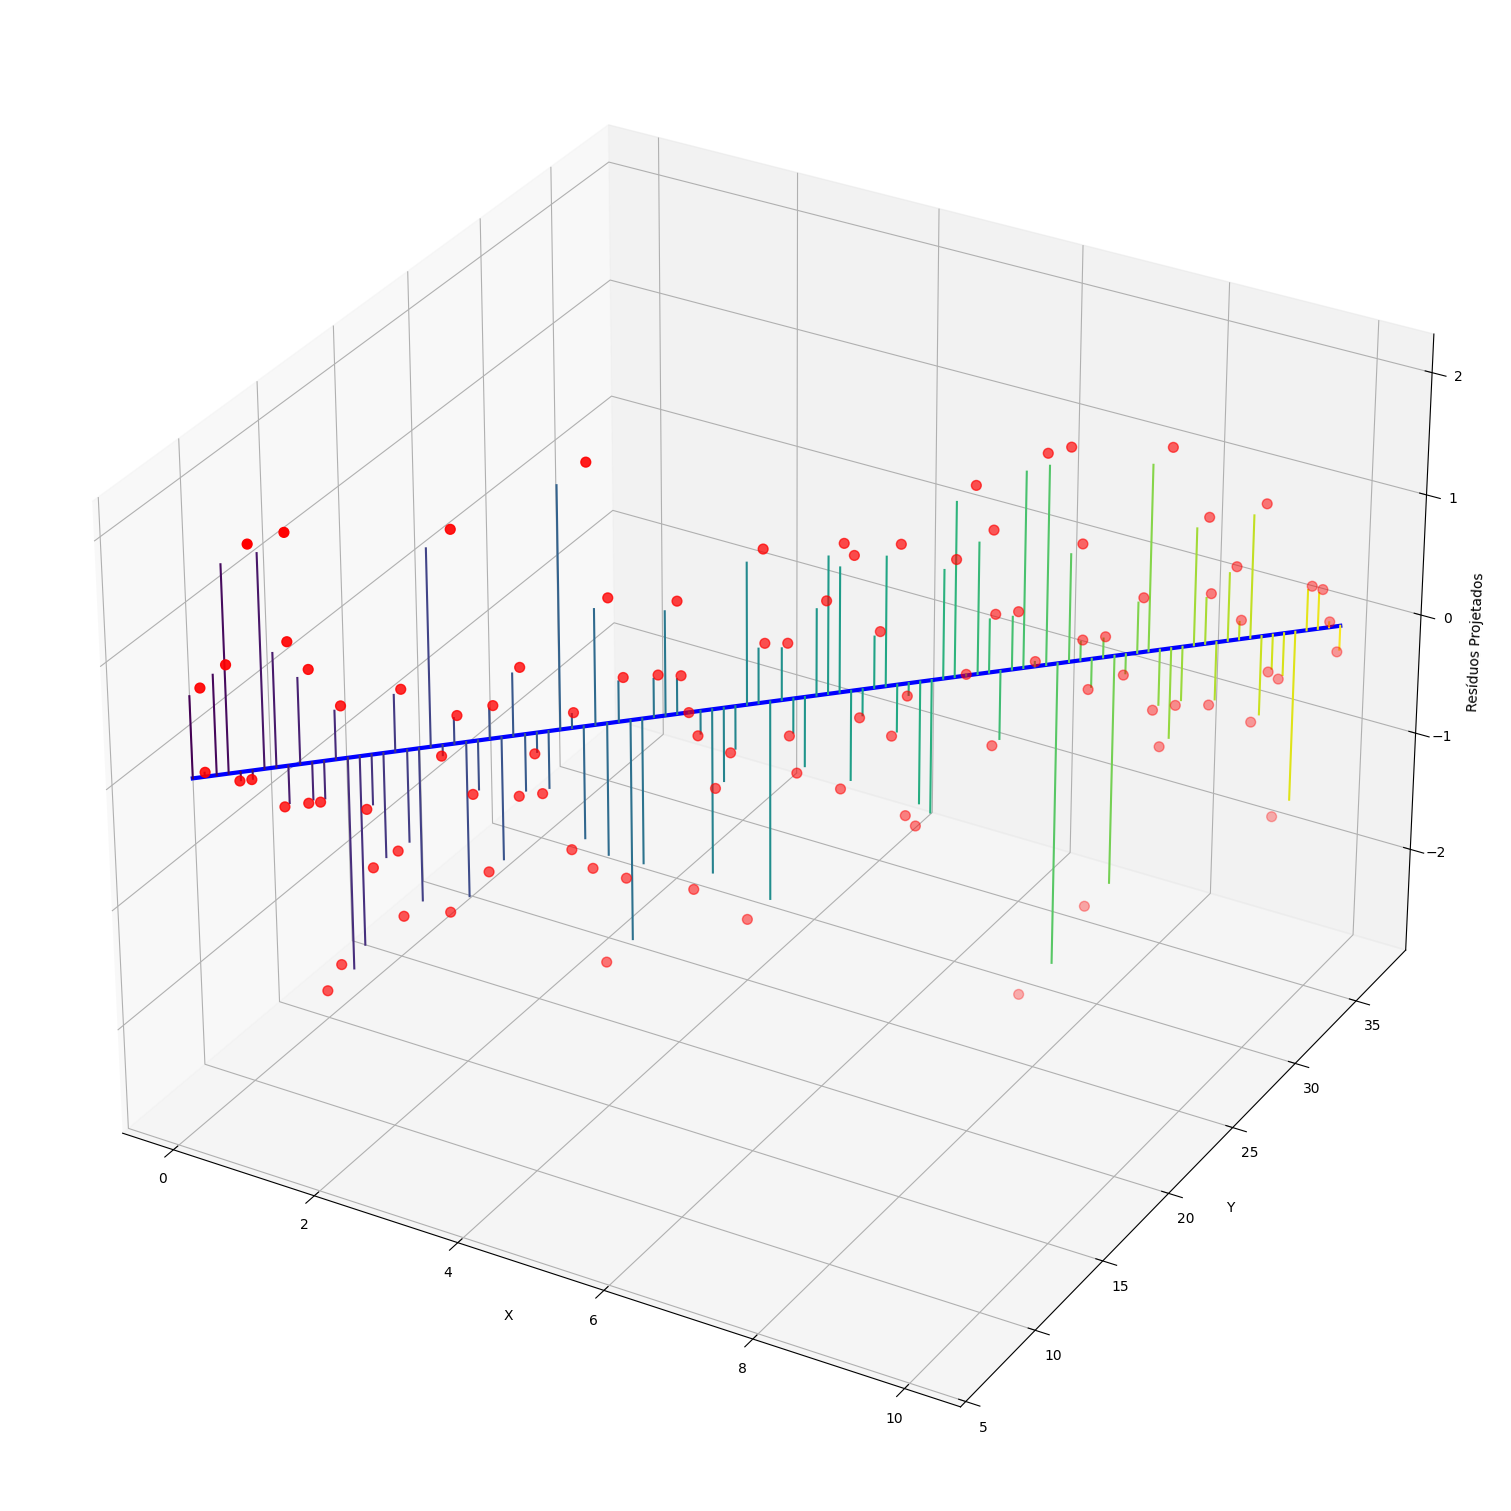

In [45]:
# Importando matplotlib para evitar o erro
import matplotlib.pyplot as plt

# Criando o gráfico com os resíduos projetados no plano X-Z
fig = plt.figure(figsize=(20, 15), constrained_layout=True)
ax = fig.add_subplot(111, projection='3d')

# Linha de regressão (reta azul)
ax.plot(X, Y_pred, np.zeros_like(Y_pred), color='b', lw=3)

# Projetando os resíduos como curvas no plano X-Z
for i in range(len(X)):
    ax.plot([X[i], X[i]], [Y_pred[i], Y_pred[i]], [0, residuos[i]], color=plt.cm.viridis(i / len(X)))

# Pontos observados
ax.scatter(X, Y, residuos, color='r', s=50)

# Ajustes dos eixos
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Resíduos Projetados')

# Mostrando o gráfico
plt.show()


In [46]:
# +-----------------------------+
# |      Tudo OK com os testes?  |
# +-----------------------------+
#           /        \
#        Sim          Não
#         /            \
# +-------------------+      +------------------------+
# | Seguir para Teste  |      | Transformação de dados |
# |   de Hat (BKW)     |      +------------------------+
# +-------------------+              /        \
#                                  Sim         Não
#                                   /           \
#                +------------------------+    +---------------------+
#                | Retirar pontos?        |    | Regressão Não Linear | 

In [48]:
#teste2
